# TITANIC DATA ANALYSIS

## IMPORT LIBRARIES

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## LOAD DATASET

In [30]:
# LOAD DATASET
df=pd.read_csv('/kaggle/input/titanic/train.csv')

## EXPLORE DATA

In [31]:
# CHECK THE FIRST FEW ROWS
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
#CHECK THE LAST FEW ROWS
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [33]:
# SUMMARY STATISTICS 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
# DISPLAY INFO ON YOUR DATA SET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the above, it is to be noted that some of the columns like 'Age' and 'cabin' have missing values. Data types for 'passengerId','survived','pclass','Sibsp'and 'parch' are wrongly classified as integers instead of strings.These should be corrected during Data cleaning

## DATA CLEANING

In [35]:
# CHECK FOR MISSING VALUES
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we will start by dropping some unnecessary columns and deleting rows with missing values.

In [36]:
# DROP 'Cabin' 'Ticket'  and  COLUMNS
df.drop('Cabin',axis=1,inplace= True)
df.drop('Ticket', axis= 1, inplace = True)

In [37]:
#check for the updated data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


'Cabin' column has been successfully dropped 

In [38]:
# REMOVE ROWS WITH MISSING VALUES 
df.dropna(inplace= True)

In [39]:
#verify the cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Fare         712 non-null    float64
 9   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 61.2+ KB


We now have 712 rows.
Now, it is time to correct the Data types of the first three columns by changing the first and third to strings and the second to boolean.

In [40]:
# CHANGE WRONGLY CLASSIFIED DATATYPES
df['PassengerId']= df['PassengerId'].astype(str)
df['Pclass']= df['Pclass'].astype(str)
df['Survived']= df['Survived'].astype(str)

In [41]:
# VERIFY CORRECTED DATATYPES
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    object 
 1   Survived     712 non-null    object 
 2   Pclass       712 non-null    object 
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Fare         712 non-null    float64
 9   Embarked     712 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 61.2+ KB


In [42]:
# Replace numeric values with corresponding strings
df['Survived'] = df['Survived'].replace({'0': 'No', '1': 'Yes'})
df['Pclass'] = df['Pclass'].replace({'1': '1st class', '2': '2nd class','3': '3rd class'})

# check replace
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,No,3rd class,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,Yes,1st class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,Yes,3rd class,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,Yes,1st class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,No,3rd class,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Now, our data is clean and ready for analysis. Let us Re-run the summary statisticsfor the numerical variables.

In [43]:
#RE-RUN SUMMARY STATISTICS FOR THE CLEANED NUMERICAL VARIABLES
df.describe()

,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000
mean,29.642093,0.514045,0.432584,34.567251
std,14.492933,0.930692,0.854181,52.938648
min,0.420000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,8.050000
50%,28.000000,0.000000,0.000000,15.645850
75%,38.000000,1.000000,1.000000,33.000000
max,80.000000,5.000000,6.000000,512.329200


## EXPLORATORY DATA ANALYSIS

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


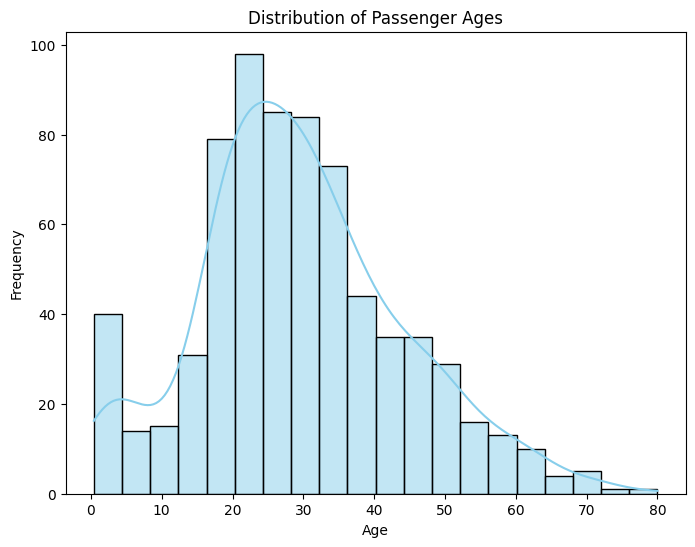

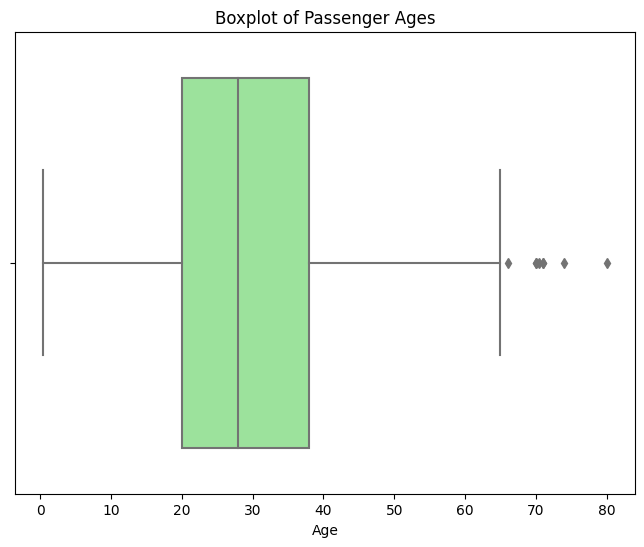

In [44]:
# 1. What is the distribution of passenger ages? Are there any outliers?

# Plot histogram of passenger ages
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot box plot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title('Boxplot of Passenger Ages')
plt.xlabel('Age')
plt.show()

The presence of double peaks in the histogram, such as those observed at ages 4 and 25 in the above dataset, can indicate the existence of distinct subgroups or populations within the data. This double peaks can signify the following:

1. Multimodal Distribution:
Different Age Groups: The double peaks suggest that there are likely two distinct age groups or subpopulations present in the dataset, with one peak representing one group and the other peak representing another.
Demographic Variation: It's possible that the Titanic had a significant number of passengers belonging to different age cohorts, resulting in the observed bimodal distribution.
2. Presence of Children and Young Adults:
Children vs. Young Adults: One peak around age 4 may represent children who were traveling with their families, while the other peak around age 25 may represent young adults who were traveling independently or with peers.
Families vs. Individuals: The presence of children may indicate families or individuals traveling with children, while young adults may include individuals traveling for work, education, or leisure.

The outliers in the >65 age group among Titanic passengers as seen in the box plot reveal diverse demographics and potential socioeconomic status. They highlight the vulnerability of elderly travelers during the disaster, reflecting historical norms. Each outlier represents a unique individual story, suggesting the need for further analysis to understand their significance within the Titanic dataset.

In [45]:
# 2. How many passengers survived, and what is the survival rate?

# Count the number of passengers who survived (where 'Survived' == 'Yes')
survived_count = (df['Survived'] == 'Yes').sum()

# Calculate the total number of passengers
total_passengers = df.shape[0]

# Calculate the survival rate
survival_rate = survived_count / total_passengers

# Print the results
print("Number of passengers survived:", survived_count)
print("Total number of passengers:", total_passengers)
print("Survival rate: {:.2%}".format(survival_rate)) 


Number of passengers survived: 288
Total number of passengers: 712
Survival rate: 40.45%


survival rate was about 40.45%

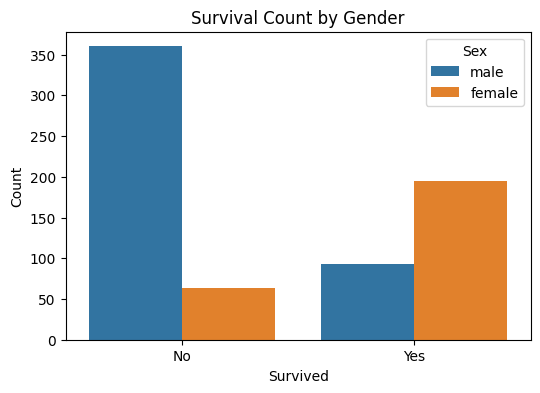

In [46]:
# 3. How does survival vary by different factors such as gender, passenger class, and age group?
# i. SURVIVAL BY GENDER

# Create a countplot to show survival by gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

The data in the bar chart above shows that a higher percentage of females survived compared to males. This highlights gender disparities in survival rates, possibly influenced by societal norms favoring women and children during emergencies like the Titanic disaster. Evacuation procedures and demographic factors may have also played a role. 

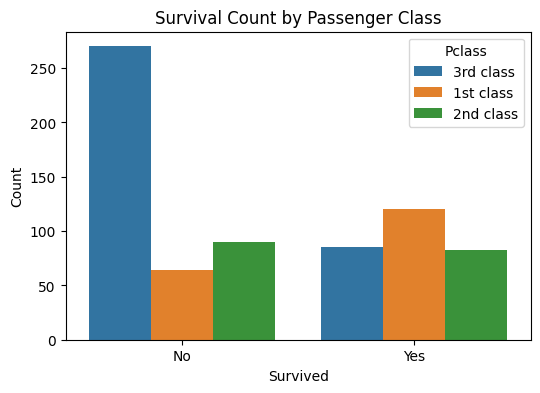

In [47]:
# ii. Survival by passenger class

# Create a countplot to show survival by passenger class
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


The observed pattern highlights the significance of socioeconomic status in determining survival outcomes during the Titanic disaster. Passengers in higher classes, indicative of wealth and privilege, had better access to resources and possibly priority during evacuation, resulting in higher survival rates. Conversely, passengers in lower classes faced greater challenges and had lower chances of survival.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


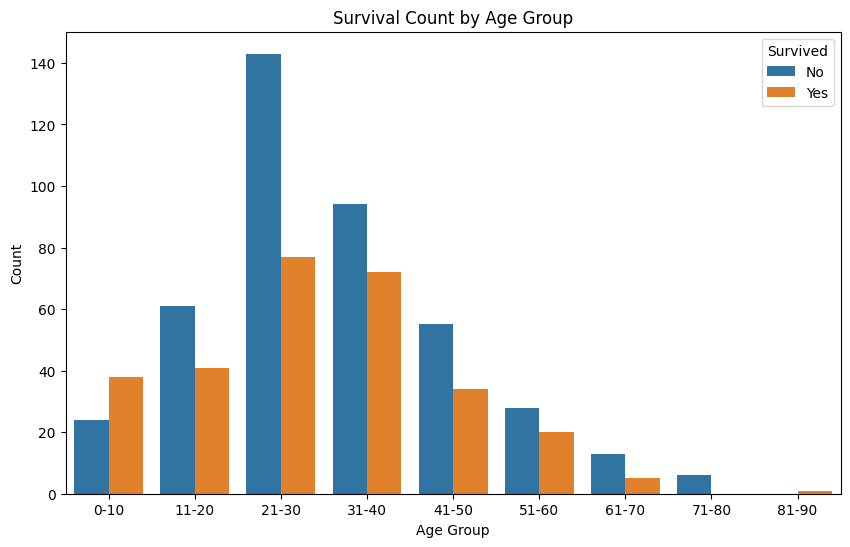

In [48]:
# iii. Survival by age groups


# Define age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Create 'AgeGroup' column based on age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Plot survival count by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


The dataset detailing survival rates across age groups aboard the Titanic offers significant insights into emergency responses and societal values during crises. It highlights ethical considerations and policy implications regarding the safeguarding of vulnerable populations, including children and the elderly. Moreover, its relevance extends to contemporary discourse on disaster preparedness and equitable emergency interventions, emphasizing the imperative of protecting lives during calamities.

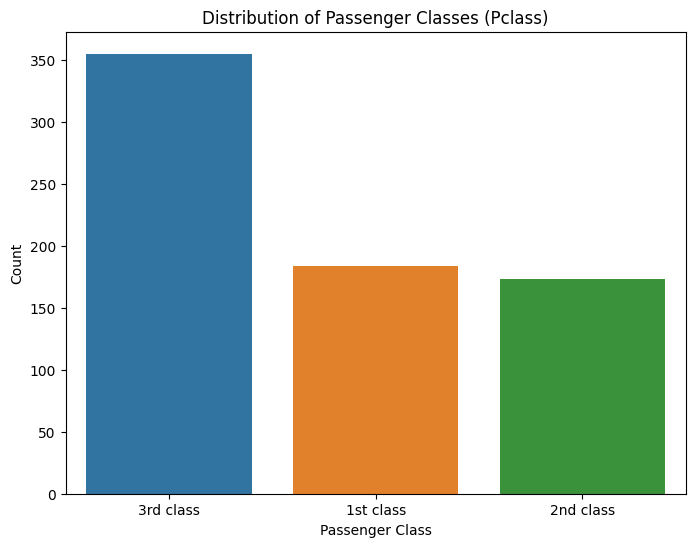

In [49]:
# 4. What is the distribution of passenger classes (Pclass)? 
# Distribution of passenger classes (Pclass)
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Passenger Classes (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

The above shows the distribution of the various passenger class. Here,the lower class are higher in number than the upper class ( even twice the number). It is a little strange considering the wealthy should be able to afford the journey more. This leads me to think that there must be sort of a subsidized ticket fee for the lower class than the upper class. This is what we want to test below

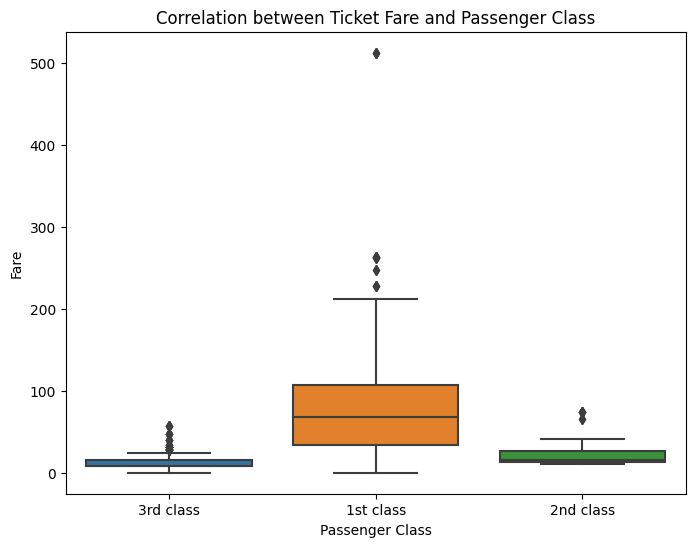

In [50]:
# 5.Is there a relationship between the ticket fare and the passenger class
# Plot boxplot to visualize the relationship between fare and passenger class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Correlation between Ticket Fare and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

The boxplot above shows as expected that the 1st class passengers paid much more ( more than 10 times) the amount paid by the third class. This might have influenced the preference during evacuation as we realised earlier. The 1st class was favoured more as they survived more than the second and the 3rd class

## Detailed Analysis and Recommendations from Titanic Data

**Analysis of Titanic Passenger Data: Comprehensive Report**

**Introduction:**
The tragic sinking of the RMS Titanic in 1912 remains etched in history as one of the deadliest maritime disasters. This report delves into the dataset of Titanic passengers, aiming to unravel insights into the factors influencing survival rates and identify areas for enhanced safety measures and disaster preparedness.

**Understanding the Data:**
The dataset encompasses information on 891 Titanic passengers, including details such as passenger ID, survival status, class, age, gender, fare, cabin, and embarkation port. Initial data exploration and cleansing procedures were employed to remove irrelevant columns, address missing values, and rectify data types for accurate analysis.

**Key Findings and Insights:**

1. **Distribution of Passenger Ages:**
   The histogram depicting passenger ages reveals a bimodal distribution, suggesting the presence of distinct age groups among passengers, possibly families with children and young adults.

2. **Survival Rate Analysis:**
   Approximately 40.45% of passengers survived the disaster, underscoring the immense human tragedy that unfolded during the Titanic's sinking.

3. **Survival Disparities by Various Factors:**
   - Gender Disparity: Females exhibited higher survival rates compared to males, hinting at a potential priority given to women and children during evacuation procedures.
   - Socioeconomic Influence: First-class passengers experienced better survival rates than those in second and third class, shedding light on socioeconomic disparities and access to resources during the disaster.
   - Age Group Impact: Children and young adults showcased higher survival rates, indicating a potential prioritization of vulnerable age groups during emergency situations.

4. **Passenger Class Distribution:**
   The dataset indicates that the majority of passengers belonged to the third class, with relatively fewer passengers in the first and second classes, reflecting the diverse socioeconomic backgrounds aboard the Titanic.

5. **Relationship between Ticket Fare and Passenger Class:**
   A notable disparity in ticket fares across passenger classes was observed, with first-class passengers paying substantially higher fares than those in second and third class, highlighting economic stratification and its probable influence on survival probabilities.

**Recommendations for Enhanced Safety Measures:**

1. **Equitable Emergency Protocols:**
   Implement fair and impartial emergency protocols to ensure the safety and well-being of all passengers, irrespective of gender, age, or socioeconomic status.

2. **Strengthening Safety Measures:**
   Enhance safety protocols and evacuation procedures to prioritize passenger safety and mitigate risks during emergencies, ensuring swift and orderly evacuation.

3. **Public Awareness Initiatives:**
   Conduct comprehensive public awareness campaigns and safety training programs to educate passengers about emergency procedures and foster a culture of safety and preparedness.

4. **Promoting Socioeconomic Equality:**
   Advocate for equal access to travel facilities and fair treatment during emergency situations, addressing socioeconomic disparities and ensuring equitable treatment for all passengers.

5. **Continuous Research and Analysis:**
   Continue conducting research and analysis to explore additional factors influencing survival rates and identify areas for improvement in disaster preparedness and response strategies.

**Conclusion:**
The analysis of Titanic passenger data offers valuable insights into the dynamics of disaster response and underscores the importance of proactive measures to mitigate risks and safeguard lives during emergencies. By prioritizing safety, promoting socioeconomic equality, and fostering a culture of preparedness, stakeholders can enhance overall safety and resilience in the face of unforeseen disasters.